In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('Assign2 Data Airfares.csv')
df.head(5)

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637,21112,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993,29838,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124,29838,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260,29838,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260,29838,7830332,7145897,Free,Free,612,25144,85.47


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S_CODE    638 non-null    object 
 1   S_CITY    638 non-null    object 
 2   E_CODE    638 non-null    object 
 3   E_CITY    638 non-null    object 
 4   COUPON    638 non-null    float64
 5   NEW       638 non-null    int64  
 6   VACATION  638 non-null    object 
 7   SW        638 non-null    object 
 8   HI        638 non-null    float64
 9   S_INCOME  638 non-null    int64  
 10  E_INCOME  638 non-null    int64  
 11  S_POP     638 non-null    int64  
 12  E_POP     638 non-null    int64  
 13  SLOT      638 non-null    object 
 14  GATE      638 non-null    object 
 15  DISTANCE  638 non-null    int64  
 16  PAX       638 non-null    int64  
 17  FARE      638 non-null    float64
dtypes: float64(3), int64(7), object(8)
memory usage: 89.8+ KB


### a)	Explora los Predictores Numéricos y FARE creando una tabla de correlación y examinando algunos gráficos de dispersión entre FARE y esos predictores. ¿Cuál parece ser el mejor predictor individual de FARE? 

### Tabla de correlación

<AxesSubplot:>

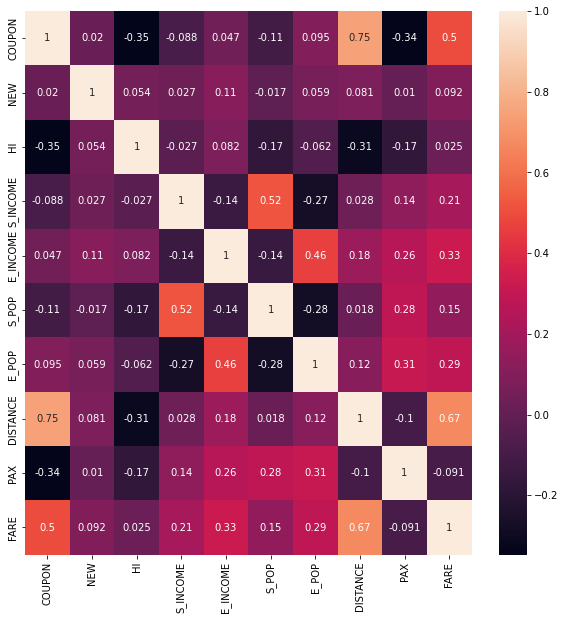

In [6]:
matriz = df.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap( matriz, annot = True)

De la tabla de correlación se observa que las variables que cuentan con mayor correlación con la variable objetivo FARE, son: DISTANCE y COUPON, ambas tienen una correlación positiva con FARE, PAX cuenta con una correlación negativa , mientras que las demás variables tienen un valor de correlación cercano a 0 por lo que no se muestra ninguna correlación significativa.

### Gráficos de dispersión:

**Entre FARE y PAX**

<AxesSubplot:title={'center':'Gráfico'}, xlabel='FARE', ylabel='PAX'>

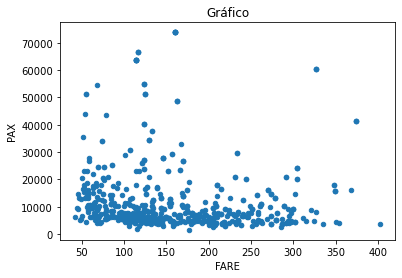

In [10]:
df.plot(kind='scatter', x='FARE', y='PAX', title='Gráfico')

**Entre FARE y  DISTANCE**

<AxesSubplot:title={'center':'Gráfico'}, xlabel='FARE', ylabel='DISTANCE'>

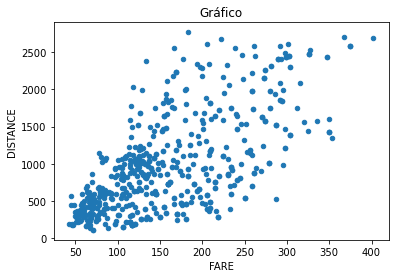

In [11]:
df.plot(kind='scatter', x='FARE', y='DISTANCE', title='Gráfico')

**Entre FARE y COUPON**

<AxesSubplot:title={'center':'Gráfico'}, xlabel='FARE', ylabel='COUPON'>

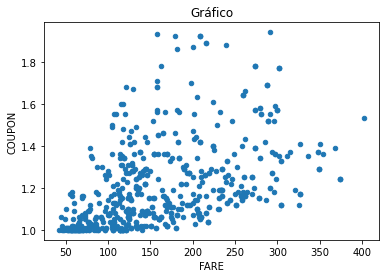

In [12]:
df.plot(kind='scatter', x='FARE', y='COUPON', title='Gráfico')

### b)	Explore los Predictores Categóricos (excluyendo los cuatro primeros) calculando el porcentaje de vuelos en cada categoría. Cree una tabla dinámica con la Tarifa Media de cada categoría. ¿Qué predictor categórico parece mejor para predecir la tarifa o FARE?

**Predictores categóricos:**
* VACATION  
* SW        
* SLOT      
* GATE      


**VACATION:**

In [13]:
pd.value_counts(df.VACATION)

No     468
Yes    170
Name: VACATION, dtype: int64

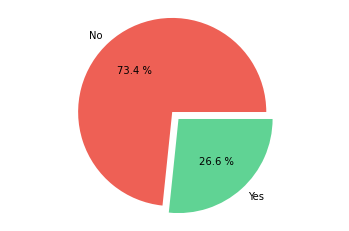

In [14]:
valor=['No','Yes']
colores = ["#EE6055","#60D394"]
desfase = (0.1,0)
plt.pie(df.VACATION.value_counts(), labels=valor, autopct="%0.1f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.show()

In [15]:
vacation_grupo = df.groupby(['VACATION'],as_index=False)['FARE'].mean()
vacation_grupo

,VACATION,FARE
0,No,173.552500
1,Yes,125.980882


**SW:**

In [16]:
pd.value_counts(df.SW)

No     444
Yes    194
Name: SW, dtype: int64

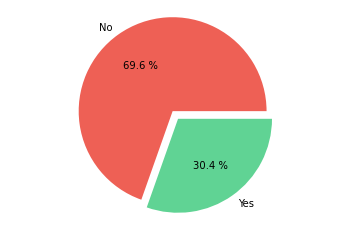

In [17]:
valor=['No','Yes']
colores = ["#EE6055","#60D394"]
desfase = (0.1,0)
plt.pie(df.SW.value_counts(), labels=valor, autopct="%0.1f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.show()

In [18]:
SW_grupo = df.groupby(['SW'],as_index=False)['FARE'].mean()
SW_grupo

,SW,FARE
0,No,188.182793
1,Yes,98.382268


**SLOT:**

In [19]:
pd.value_counts(df.SLOT)

Free          456
Controlled    182
Name: SLOT, dtype: int64

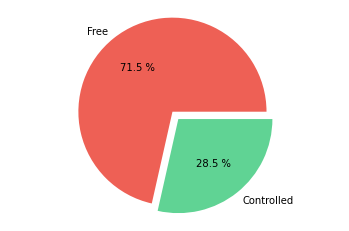

In [20]:
valor=['Free','Controlled']
colores = ["#EE6055","#60D394"]
desfase = (0.1,0)
plt.pie(df.SLOT.value_counts(), labels=valor, autopct="%0.1f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.show()

In [21]:
SLOT_grupo = df.groupby(['SLOT'],as_index=False)['FARE'].mean()
SLOT_grupo

,SLOT,FARE
0,Controlled,186.059396
1,Free,150.825680


**GATE:**

In [22]:
pd.value_counts(df.GATE)

Free           514
Constrained    124
Name: GATE, dtype: int64

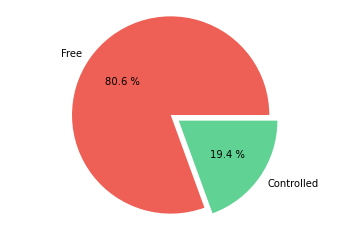

In [23]:
valor=['Free','Controlled']
colores = ["#EE6055","#60D394"]
desfase = (0.1,0)
plt.pie(df.GATE.value_counts(), labels=valor, autopct="%0.1f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.show()

In [24]:
GATE_grupo = df.groupby(['GATE'],as_index=False)['FARE'].mean()
GATE_grupo

,GATE,FARE
0,Constrained,193.129032
1,Free,153.095953


**Conclusión:** 
* FARE es más alto para GATE Constrained con 193 y el más bajo es SW Yes con 98. 
* Entonces los vuelos donde Southwest Airlines sirve esa ruta es más barato y Si el aeropuerto de punto final tiene   restricciones es más caro.



### c)	Divida los datos en conjuntos de entrenamiento (60%) y de validación (40%). Utilice la regresión por pasos para reducir el número de predictores, e identifique el mejor entre los modelos candidatos generados basándose en la medida AIC. Puede ignorar los cuatro primeros predictores (CODE, S CITY, E CODE, E CITY) al generar los modelos candidatos.

Ignoramos los 4 primeros predictores (CODE, S CITY, E CODE, E CITY):

In [25]:
df_model=df.iloc[:,4:]
df_model.head(5)

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,1.00,3,No,Yes,5291.99,28637,21112,3036732,205711,Free,Free,312,7864,64.11
1,1.06,3,No,No,5419.16,26993,29838,3532657,7145897,Free,Free,576,8820,174.47
2,1.06,3,No,No,9185.28,30124,29838,5787293,7145897,Free,Free,364,6452,207.76
3,1.06,3,No,Yes,2657.35,29260,29838,7830332,7145897,Controlled,Free,612,25144,85.47
4,1.06,3,No,Yes,2657.35,29260,29838,7830332,7145897,Free,Free,612,25144,85.47


Convertimos las variables categóricas en variables numéricas para los modelos:

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_model.VACATION = le.fit_transform(df_model.VACATION)
df_model.SW = le.fit_transform(df_model.SW)
df_model.SLOT = le.fit_transform(df_model.SLOT)
df_model.GATE = le.fit_transform(df_model.GATE)

df_model.head(5)

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,1.00,3,0,1,5291.99,28637,21112,3036732,205711,1,1,312,7864,64.11
1,1.06,3,0,0,5419.16,26993,29838,3532657,7145897,1,1,576,8820,174.47
2,1.06,3,0,0,9185.28,30124,29838,5787293,7145897,1,1,364,6452,207.76
3,1.06,3,0,1,2657.35,29260,29838,7830332,7145897,0,1,612,25144,85.47
4,1.06,3,0,1,2657.35,29260,29838,7830332,7145897,1,1,612,25144,85.47


División de los datos en conjunto de Entrenamiento (60%) y Validación (40%)

In [27]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier

In [29]:
X, y = df_model.drop('FARE', axis=1), df['FARE']
X.shape, y.shape

((638, 13), (638,))

In [30]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.4, random_state=42)

In [31]:
X_train.shape, X_test.shape

((382, 13), (256, 13))

### 1. Sequential Forward Selection (SFS)

In [32]:
sfs = SFS(LinearRegression(),
         k_features = 13,
         forward= True,
         floating= False,
         verbose= 2,
         scoring='r2',
         cv= 4, 
         n_jobs= 1
         ).fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.2s finished

[2022-07-14 13:12:50] Features: 1/13 -- score: 0.39221558013451296[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2022-07-14 13:12:50] Features: 2/13 -- score: 0.5615418818258877[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-07-14 13:12:50] Features: 3/13 -- score: 0.6834338015636586[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [33]:
print('CV Score:')
sfs.k_score_

CV Score:


0.7638552771830744

In [34]:
sfs.k_feature_names_

('COUPON',
 'NEW',
 'VACATION',
 'SW',
 'HI',
 'S_INCOME',
 'E_INCOME',
 'S_POP',
 'E_POP',
 'SLOT',
 'GATE',
 'DISTANCE',
 'PAX')

In [35]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)","[0.4001660814671931, 0.26710182824167117, 0.36...",0.392216,"(DISTANCE,)",0.153359,0.095671,0.055236
2,"(3, 11)","[0.5721602706814546, 0.4908188819252739, 0.542...",0.561542,"(SW, DISTANCE)",0.086588,0.054017,0.031187
3,"(2, 3, 11)","[0.6920861367946469, 0.6407489106228288, 0.675...",0.683434,"(VACATION, SW, DISTANCE)",0.048879,0.030493,0.017605
4,"(2, 3, 4, 11)","[0.7227502846526248, 0.675673629643668, 0.7181...",0.702918,"(VACATION, SW, HI, DISTANCE)",0.030297,0.0189,0.010912
5,"(2, 3, 4, 10, 11)","[0.7387834606999026, 0.6805990125769864, 0.736...",0.718748,"(VACATION, SW, HI, GATE, DISTANCE)",0.037378,0.023318,0.013463
6,"(2, 3, 4, 9, 10, 11)","[0.77106528823955, 0.7156553979253646, 0.73996...",0.741422,"(VACATION, SW, HI, SLOT, GATE, DISTANCE)",0.031561,0.019689,0.011367
7,"(2, 3, 4, 9, 10, 11, 12)","[0.7759776872501167, 0.7114689080722043, 0.745...",0.744265,"(VACATION, SW, HI, SLOT, GATE, DISTANCE, PAX)",0.036576,0.022818,0.013174
8,"(2, 3, 4, 8, 9, 10, 11, 12)","[0.7773602217507869, 0.7219815713032967, 0.752...",0.7487,"(VACATION, SW, HI, E_POP, SLOT, GATE, DISTANCE...",0.031821,0.019851,0.011461
9,"(2, 3, 4, 7, 8, 9, 10, 11, 12)","[0.7851263432786988, 0.7379387672913919, 0.758...",0.759724,"(VACATION, SW, HI, S_POP, E_POP, SLOT, GATE, D...",0.026915,0.016791,0.009694
10,"(2, 3, 4, 6, 7, 8, 9, 10, 11, 12)","[0.7904540780043897, 0.7519638957375167, 0.757...",0.763181,"(VACATION, SW, HI, E_INCOME, S_POP, E_POP, SLO...",0.025416,0.015856,0.009154


Podemos apreciar el avg_score, empieza a disminuir, esto nos dice que, con 11 variables, el modelo de regresión lineal genera el mejor resultado.

###  2. Sequential Forward Floating Selection (SFFS)

In [38]:
sffs = SFS(LinearRegression(),
         k_features = 13,
         forward= True,
         floating= True,
         verbose= 2,
         scoring='r2',
         cv= 4, 
         n_jobs= 1
         ).fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2022-07-14 13:13:51] Features: 1/13 -- score: 0.39221558013451296[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-07-14 13:13:51] Features: 2/13 -- score: 0.5615418818258877[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_j

In [40]:
print('CV Score:')
print(sffs.k_score_)

CV Score:
0.7638552771830744


### Sequential Backward Floating Selection (SBFS)

In [41]:
sbfs = SFS(LinearRegression(),
         k_features = 13,
         forward= True,
         floating= True,
         verbose= 2,
         scoring='r2',
         cv= 4, 
         n_jobs= 1
         ).fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2022-07-14 13:14:39] Features: 1/13 -- score: 0.39221558013451296[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-07-14 13:14:39] Features: 2/13 -- score: 0.5615418818258877[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_j

In [43]:
print('CV Score:')
print(sbfs.k_score_)

CV Score:
0.7638552771830744


con los dos ultimos modelos obtenemos el mismo resultado

### d)	Compare el rendimiento de un modelo simple que incluya sólo los dos predictores identificados en las partes (a) y (b) con el modelo o modelos identificados en las partes c y d con respecto al error del conjunto de validación.

**MODELO Regresión Lineal**

* Modelo simple que incluya sólo los dos predictores 

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report

In [45]:
df_model

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,1.00,3,0,1,5291.99,28637,21112,3036732,205711,1,1,312,7864,64.11
1,1.06,3,0,0,5419.16,26993,29838,3532657,7145897,1,1,576,8820,174.47
2,1.06,3,0,0,9185.28,30124,29838,5787293,7145897,1,1,364,6452,207.76
3,1.06,3,0,1,2657.35,29260,29838,7830332,7145897,0,1,612,25144,85.47
4,1.06,3,0,1,2657.35,29260,29838,7830332,7145897,1,1,612,25144,85.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,1.08,3,1,0,2216.70,32991,37375,8621121,991717,0,1,1030,34324,129.63
634,1.08,0,1,0,2216.70,32991,37375,8621121,991717,1,0,1030,34324,129.63
635,1.17,3,1,0,6797.80,27994,37375,4948339,991717,1,1,960,6016,124.87
636,1.28,3,1,0,5566.43,31981,37375,4549784,991717,1,1,858,4877,129.62


In [46]:
X=df_model[['DISTANCE','SW']]
y=df_model['FARE']

In [47]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.4, random_state=42)
X_train.shape,X_test.shape

((382, 2), (256, 2))

In [48]:
model1 = LinearRegression()
model1 = model1.fit(X_train, y_train)

In [49]:
y_pred = model1.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
mean = mean_absolute_error(y_train, y_pred)
print('********************************************')
print('Para el conjunto de datos de entrenamiento')
print('Error absoluto (MAE): ', mean)
print('Error cuadrático medio: ', rmse)
print('Puntaje R2 : ', r2)

y_pred = model1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mean = mean_absolute_error(y_test, y_pred)
print('********************************************')
print('Para el conjunto de datos de validación')
print('Error absoluto (MAE): ', mean)
print('Error cuadrático medio: ', rmse)
print('Puntaje R2 : ', r2)

********************************************
Para el conjunto de datos de entrenamiento
Error absoluto (MAE):  39.14378753111987
Error cuadrático medio:  49.77686317019353
Puntaje R2 :  0.5726014774954075
********************************************
Para el conjunto de datos de validación
Error absoluto (MAE):  34.760879096006484
Error cuadrático medio:  44.76519421691505
Puntaje R2 :  0.6471993039193833


In [50]:
pred = model1.predict(X)
pred

array([ 70.6520695 , 156.51651861, 142.95599967,  89.84148309,
        89.84148309,  70.46017537, 197.70979312, 109.60657909,
       130.58700462, 112.35706171, 185.27683335, 199.66889355,
        88.24236529, 114.14807364, 131.25045738, 131.25045738,
       131.25045738, 101.0992724 , 178.68846802, 170.05323191,
       197.17426978, 276.64224769,  97.32535439, 104.80922569,
        87.53875346,  87.53875346,  76.47285829, 179.73570906,
       138.2865757 , 138.2865757 , 138.2865757 , 160.41836604,
       160.41836604, 160.41836604, 134.19283413, 165.85536656,
       157.34805987, 157.34805987, 179.79967377, 154.14982427,
       154.14982427, 154.14982427, 157.73184814, 157.73184814,
       112.99670883, 112.99670883, 174.29870854, 174.29870854,
       135.91988136, 135.91988136, 143.40375266, 155.55704793,
        70.90792835,  70.90792835, 157.539954  , 171.9320142 ,
       158.17960112, 172.95544959, 224.3191133 , 224.3191133 ,
       224.3191133 , 154.8534361 , 214.08475939, 214.08

In [51]:
from sklearn import metrics
rss = len(pred)*metrics.mean_squared_error(y,pred)
print('RSS = {}'.format(rss))

RSS = 1459499.3818977121


MODELO Regresion Linear

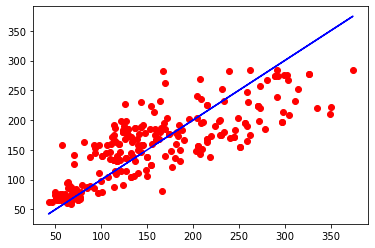

In [52]:
plt.scatter(y_test, y_pred, c='r')
plt.plot(y_test, y_test, c='blue')
plt.show()

* Modelo de regresion lineal para 10 variables predictoras

In [58]:
X=df_model[['HI','E_INCOME','S_POP','E_POP','DISTANCE','PAX','SW','VACATION','SLOT','GATE']]
y=df_model['FARE']

In [59]:
X_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
X_train.shape,X_test.shape

((382, 10), (256, 2))

In [60]:
model2= LinearRegression()
model2= model2.fit(X_train,y_train)

In [61]:
y_pred = model2.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
mean = mean_absolute_error(y_train, y_pred)
print('********************************************')
print('Para el conjunto de datos de entrenamiento')
print('Error absoluto (MAE): ', mean)
print('Error cuadrático medio: ', rmse)
print('Puntaje R2 : ', r2)

********************************************
Para el conjunto de datos de entrenamiento
Error absoluto (MAE):  28.25497119686369
Error cuadrático medio:  35.79890819676804
Puntaje R2 :  0.7789362514198697


Como estamos evaluando con la metrica de R2 , esta nos dice que mientras el valor se acerque a 1 , la predicción es mejor. Por lo tanto, el modelo con 10 variables predictoras nos esta arrojando mejores resultados a comparación del modelo con 2 variables predictoras

### e)	Utilizando los modelos de las partes (c) y (d), prediga la tarifa media en una ruta con las siguientes características: 
COUPON = 1.202, NEW = 3, VACATION = No, SW = No, HI = 4442.141, S_INCOME = 28,760, E_INCOME = 27,664, S_POP = 4,557,004, E_POP = 3,195,503, SLOT = Free, GATE = Free, PAX = 12782, DISTANCE = 1976 miles.

Además, prediga la reducción de la tarifa media en la ruta si Southwest decide cubrir esta ruta.

In [69]:
datos=np.array([[4442.141, 27.664, 4557.004, 3195.503, 1976, 12782, 0, 0, 1, 1]])

In [70]:
prediccion=model2.predict(datos)
prediccion

array([172.9389486])

**tarifa media en la ruta si Southwest decide cubrir esta ruta**

In [71]:
dato_SW=np.array([[4442.141, 27.664, 4557.004, 3195.503, 1976, 12782, 1, 0, 1, 1]])
prediccion_sw=model2.predict(dato_SW)
prediccion_sw

array([131.74210958])

In [72]:
reduccion_SW = prediccion-prediccion_sw
print('La reduccion de tarifa si SouthWest cubre la ruta es de : ', reduccion_SW )

La reduccion de tarifa si SouthWest cubre la ruta es de :  [41.19683902]


### g)	Construya un modelo que incluya sólo los factores que están disponibles antes de que los vuelos comiencen a operar en la nueva ruta, y evalúe el rendimiento de este modelo en relación con el modelo construido en la parte (c). 

In [74]:
X=df_model[['HI','NEW','S_INCOME','E_INCOME','S_POP','E_POP','DISTANCE','PAX','SLOT','GATE']]
y=df_model['FARE']

In [78]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
X_train.shape,X_test.shape

((382, 10), (256, 10))

In [83]:
model3= LinearRegression()
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)

In [89]:
r2 = r2_score(y_test, y_pred)
print('r2:', r2)

r2: 0.7074090912014295


Gráfica entre y_test e y_pred

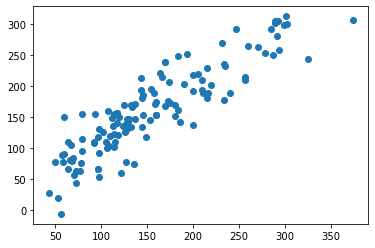

In [101]:
plt.scatter(y_test,y_pred)

El modelo evaluado muestra un r2 de 0.70, mientras que el modelo desarrollado en el apartado C (modelo con 10 variables predictoras) cuenta con un r2 de 0.76. Se nota una clara diferencia entre ellos, siendo el mejor modelo de predicción el evaluado en el apartado C 

Hemos obtenido según las métricas, que el modelo realizado en el apartado C genera una predicción con menor error a comparación de las demás, por tal motivo nos quedaremos con ese modelo como nuestro resultado final

In [102]:
X=df_model[['HI','E_INCOME','S_POP','E_POP','DISTANCE','PAX','SW','VACATION','SLOT','GATE']]
y=df_model['FARE']

In [103]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((510, 10), (128, 10))

In [104]:
model_f= LinearRegression()
model_f.fit(X_train,y_train)
y_pred = model_f.predict(X_test)

In [105]:
r2 = r2_score(y_test, y_pred)
r2

0.7811767167830942

In [106]:
coeficientes_df=pd.DataFrame(model_f.coef_,X.columns,columns=['Coeficiente'])
coeficientes_df

,Coeficiente
HI,0.008726
E_INCOME,0.001260
S_POP,0.000004
E_POP,0.000004
DISTANCE,0.077031
PAX,-0.000852
SW,-45.020402
VACATION,-37.380633
SLOT,-16.494202
GATE,-20.597440


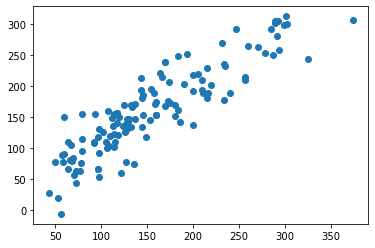

In [107]:
#Grafica entre y_test e y_pred
plt.scatter(y_test,y_pred)

### h)	En los sectores competitivos, un nuevo participante con un plan de negocio novedoso puede tener un efecto disruptivo en las empresas existentes. Si el modelo de negocio de un nuevo participante es sostenible, los demás actores se ven obligados a responder cambiando sus prácticas empresariales. Si el objetivo del análisis fuera evaluar el efecto de la presencia de Southwest Airlines en la industria aérea en lugar de predecir las tarifas de las nuevas rutas, ¿en qué se diferenciaría el análisis?

In [110]:
from matplotlib import style
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [117]:
#ajustamos los parámetros de matplotlib
plt.rcParams['image.cmap'] = 'bwr'
plt.rcParams['savefig.bbox'] = 'tight'
style.use('ggplot') or plt.style.use('ggplot')

In [118]:
df.head(5)

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637,21112,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993,29838,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124,29838,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260,29838,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260,29838,7830332,7145897,Free,Free,612,25144,85.47


graficamos la cantidad de personas por precio de los vuelos

Text(0.5, 1.0, 'Distribución de cantidad de personas y vuelos')

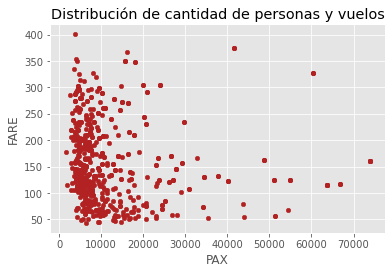

In [122]:
fig, ax = plt.subplots(figsize=(6,3.84))

df.plot(
    x = 'PAX',
    y = 'FARE',
    c = 'firebrick',
    kind = 'scatter',
    ax = ax
)
ax.set_title('Distribución de cantidad de personas y vuelos')

In [123]:
#hallamos la correlación

corr_test = pearsonr(x=df['PAX'], y=df['FARE'])
print('Coeficiente de correlación de Pearson:', corr_test[0])
print('P-value:', corr_test[1])

Coeficiente de correlación de Pearson: -0.09070540931076154
P-value: 0.02194437371703266


In [124]:
y=df['FARE']

Debido a que en este caso se busca realizar una predicción de la influencia de la presencia de la empresa southwest en la industria, se utiliza como parámetro SW, esta es una variable categórica, por lo que es necesario aplicar dummies. El objetivo de usar dummies es expresar esta variable categórica en valores numéricos esto permite que al ser valores numéricos se pueda aplicar un modelo predictivo como lo es la regresión 

In [125]:
sw = pd.get_dummies(df['SW'], drop_first=True)
df.drop(['SW'],axis=1,inplace=True)
df= pd.concat([df,sw],axis=1)

In [127]:
df.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE,Yes
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,5291.99,28637,21112,3036732,205711,Free,Free,312,7864,64.11,1
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,5419.16,26993,29838,3532657,7145897,Free,Free,576,8820,174.47,0
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,9185.28,30124,29838,5787293,7145897,Free,Free,364,6452,207.76,0
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,2657.35,29260,29838,7830332,7145897,Controlled,Free,612,25144,85.47,1
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,2657.35,29260,29838,7830332,7145897,Free,Free,612,25144,85.47,1


In [128]:
X_train, X_test , y_train , y_test = train_test_split(
                                                sw.values.reshape(-1,1),
                                                y.values.reshape(-1,1),
                                                train_size=0.8,
                                                random_state=1234,
                                                shuffle=True)

In [129]:
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1,1), y = y_train) 

LinearRegression()

In [142]:
print('Intercept', modelo.intercept_)
print('Coeficiente:', list(zip(X.columns, modelo.coef_.flatten())))

Intercept [188.52988604]
Coeficiente: [('HI', -90.73655270655274)]


En este punto la predicción de los precios ya no se basa en las nuevas rutas, ahora se basa en la existencia o no, de la empresa Southwest Airlines en dicha zona.

In [147]:
predicciones=modelo.predict(X_test)
print('Predicciones:', predicciones[0:5,])

rmse = mean_squared_error(
                    y_true = y_test,
                    y_pred = predicciones,
                    squared = False
                    )
print(f'El error (rmse) de test es: {rmse}')

Predicciones: [[188.52988604]
 [188.52988604]
 [188.52988604]
 [ 97.79333333]
 [188.52988604]]
El error (rmse) de test es: 66.60919591498119
